In [4]:
import pandas as pd
import  numpy as  np
import matplotlib.pyplot  as  plt
import seaborn  as  sns
from sklearn.cluster  import KMeans

In [5]:
df= pd.read_csv('Mall_Customers.csv')
df.head()

CustomerID  Gender  Age  Annual Income (k$)  Spending Score (1-100)
0           1    Male   19                  15                      39
1           2    Male   21                  15                      81
2           3  Female   20                  16                       6
3           4  Female   23                  16                      77
4           5  Female   31                  17                      40

In [6]:
df.describe()

CustomerID         Age  Annual Income (k$)  Spending Score (1-100)
count  200.000000  200.000000          200.000000              200.000000
mean   100.500000   38.850000           60.560000               50.200000
std     57.879185   13.969007           26.264721               25.823522
min      1.000000   18.000000           15.000000                1.000000
25%     50.750000   28.750000           41.500000               34.750000
50%    100.500000   36.000000           61.500000               50.000000
75%    150.250000   49.000000           78.000000               73.000000
max    200.000000   70.000000          137.000000               99.000000

In [7]:
df.shape

(200, 5)

In [8]:
df.dtypes

CustomerID                 int64
Gender                    object
Age                        int64
Annual Income (k$)         int64
Spending Score (1-100)     int64
dtype: object

In [9]:
df.isnull().sum()

CustomerID                0
Gender                    0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64

<Axes: xlabel='Annual Income (k$)', ylabel='Count'>

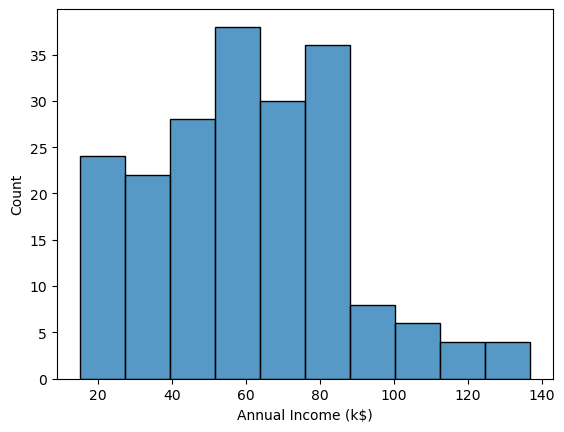

In [10]:
sns.histplot(df['Annual Income (k$)'])

In [11]:
df.columns

Index(['CustomerID', 'Gender', 'Age', 'Annual Income (k$)',
       'Spending Score (1-100)'],
      dtype='object')

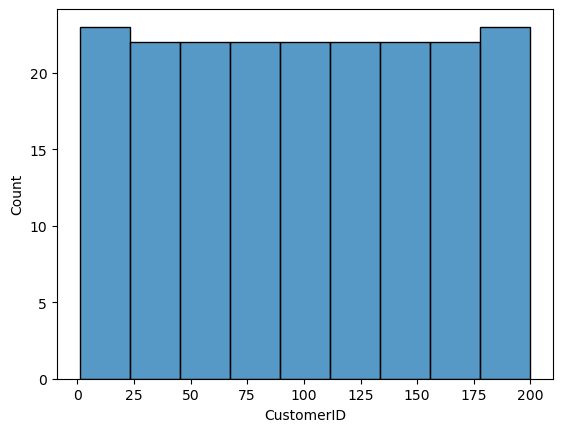

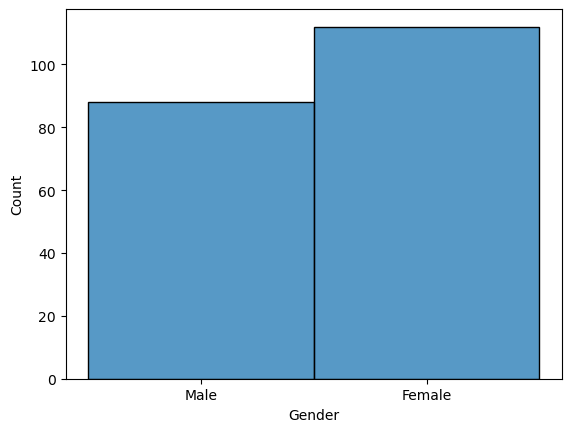

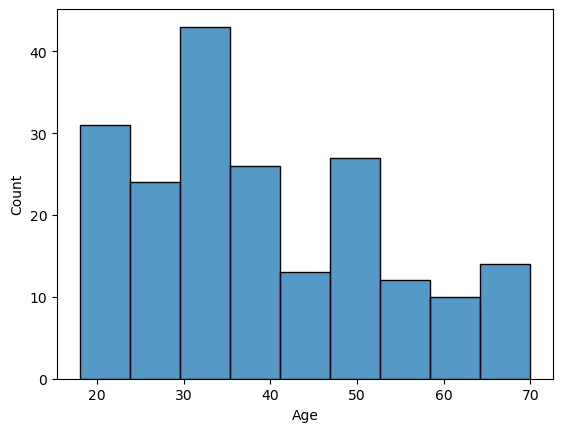

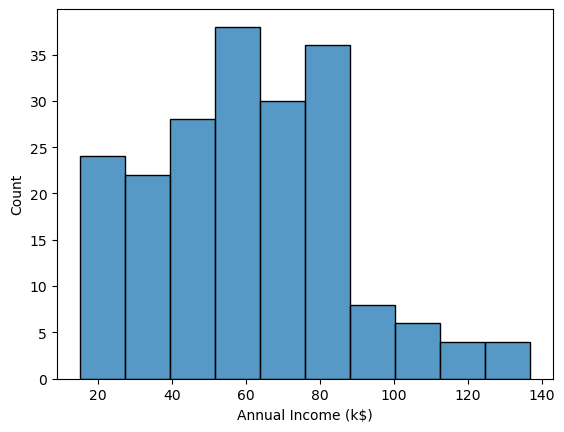

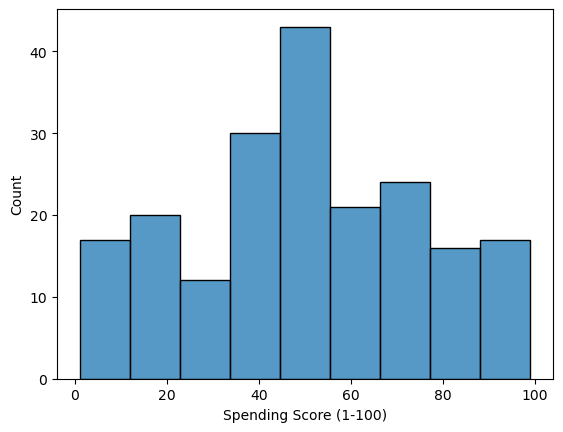

In [12]:
# Using  function to draw the histogram  for each  column

cols=['CustomerID', 'Gender', 'Age', 'Annual Income (k$)',
       'Spending Score (1-100)']
for i in cols:
    plt.figure()
    sns.histplot(df[i])

C:\Users\HP\AppData\Local\Temp\ipykernel_11784\2990425741.py:1: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(df['Annual Income (k$)'], shade= True)


<Axes: xlabel='Annual Income (k$)', ylabel='Density'>

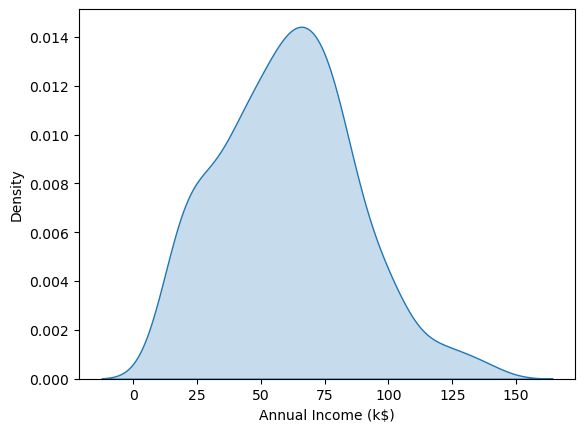

In [13]:
sns.kdeplot(df['Annual Income (k$)'], shade= True)

In [14]:
## Using function to  find the KDE   for each columns

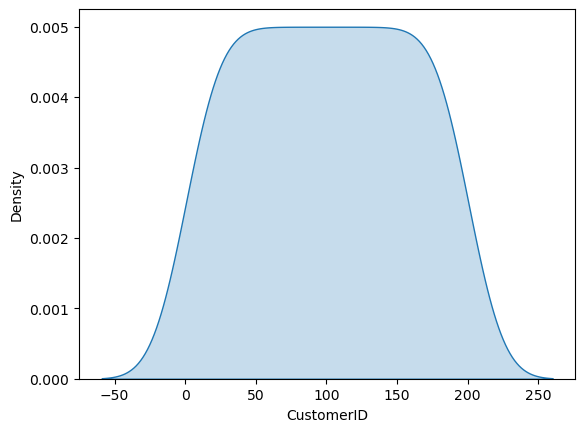

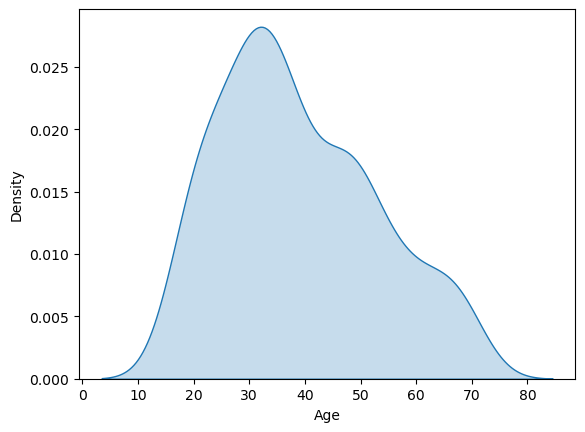

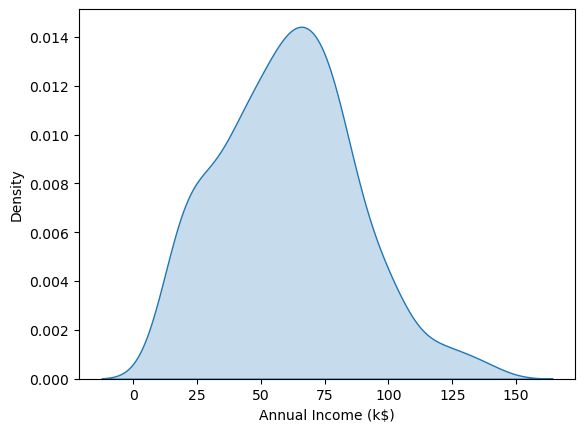

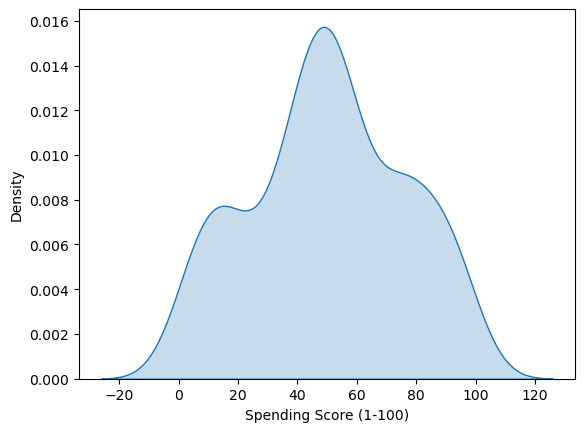

In [15]:
import warnings
warnings.filterwarnings("ignore")
cols=['CustomerID', 'Age', 'Annual Income (k$)',
       'Spending Score (1-100)']
for x in cols:
    plt.figure()
    sns.kdeplot(df[x],shade=True)

Boxplots are particularly useful for identifying skewed data, comparing distributions between groups, and spotting potential outliers. They provide a quick and informative summary of the data's central tendency and spread.

Box: The box in the middle represents the interquartile range (IQR), which spans from the 25th percentile (Q1) to the 75th percentile (Q3). This range contains the middle 50% of the data.
Line in the Box: The line inside the box represents the median, which is the middle value when the data is sorted.

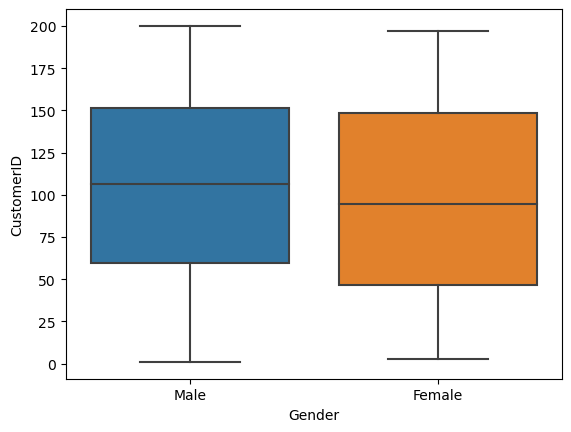

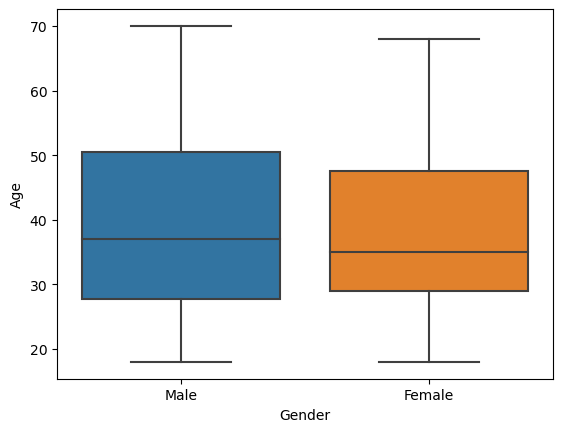

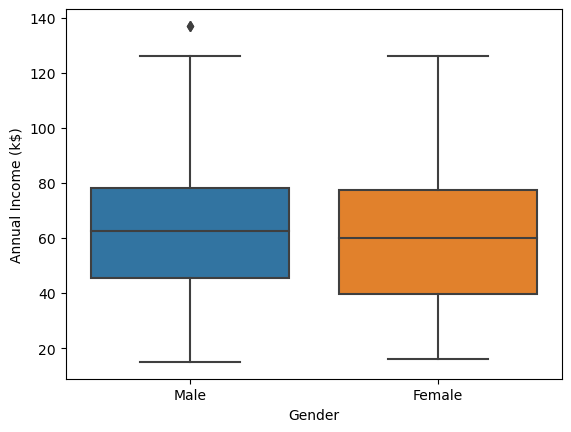

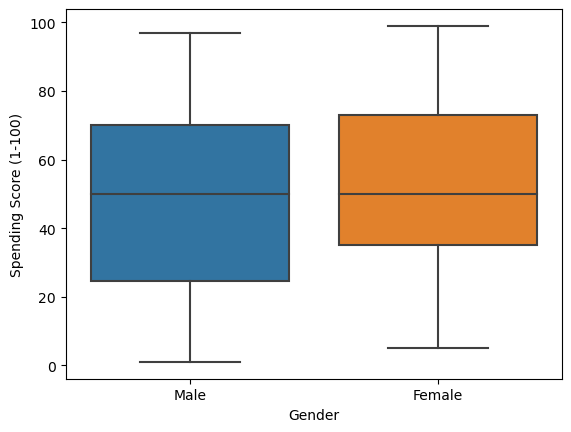

In [16]:
cols=['CustomerID', 'Age', 'Annual Income (k$)',
       'Spending Score (1-100)']
for i in cols:
    plt.figure()
    sns.boxplot(data =df, x='Gender',y=df[i])

<Axes: xlabel='Annual Income (k$)', ylabel='Spending Score (1-100)'>

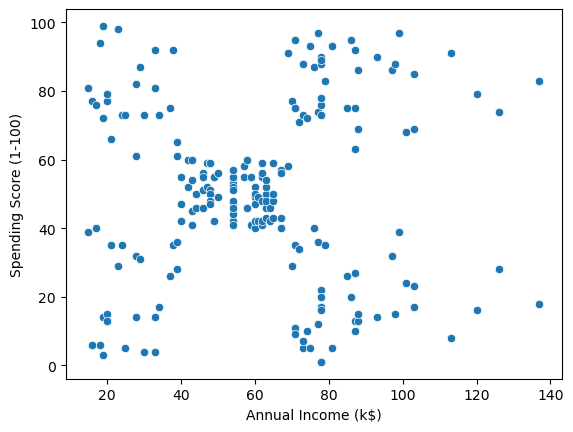

In [17]:
# starting with making the  scatter plot for our parameters
sns.scatterplot(data=df,x='Annual Income (k$)',y='Spending Score (1-100)')

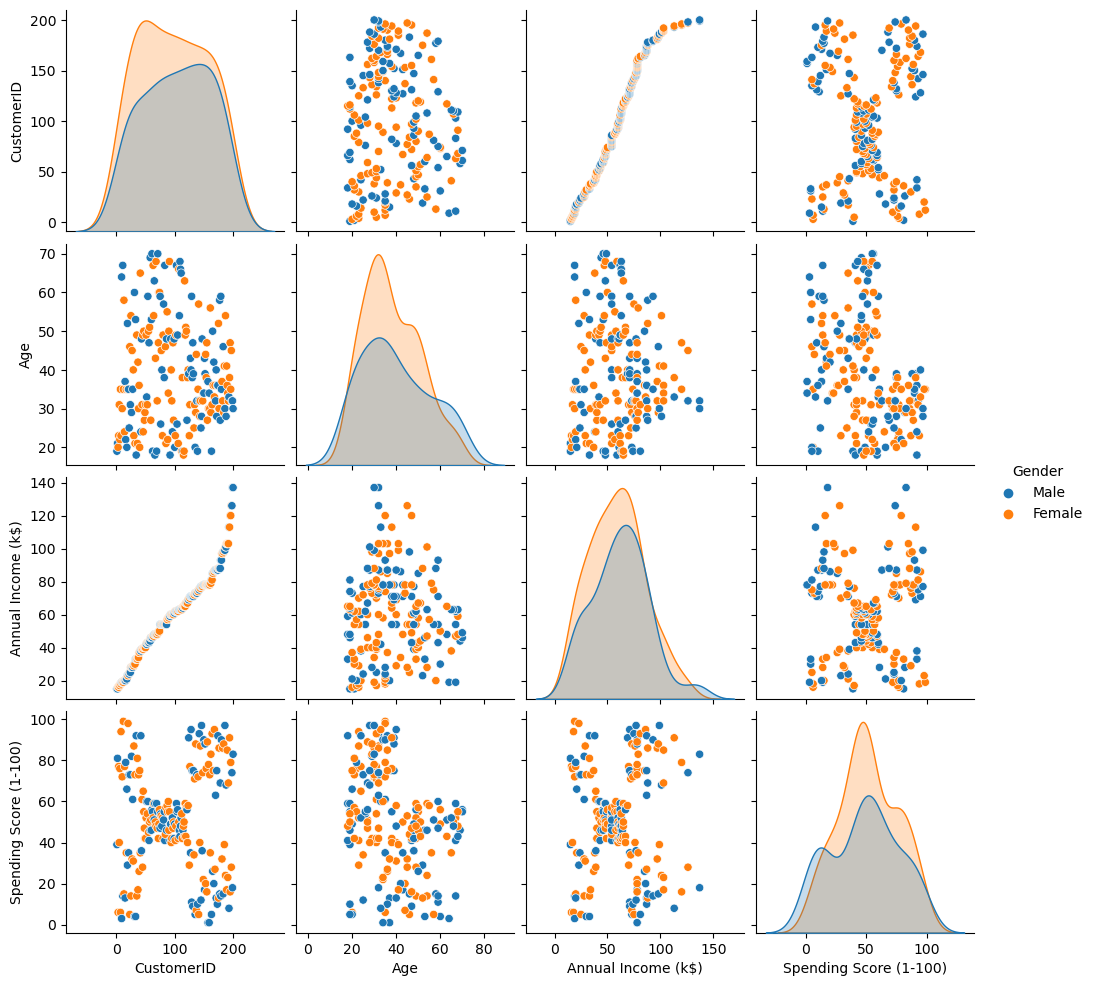

In [18]:
sns.pairplot(df,hue='Gender')

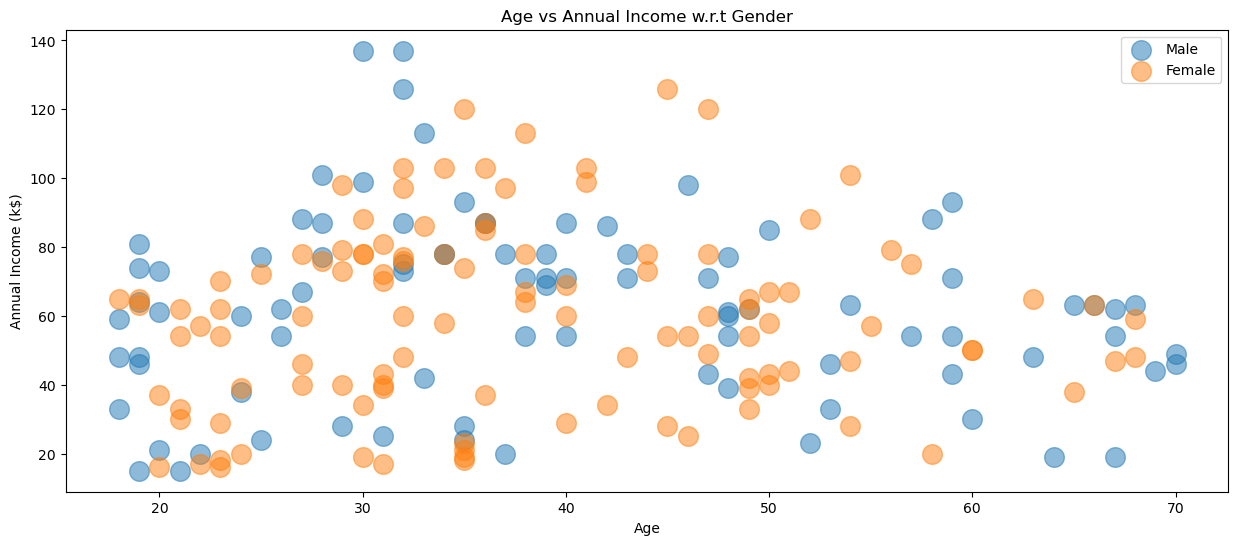

In [19]:
plt.figure(1 , figsize = (15 , 6))
for gender in ['Male' , 'Female']:
    plt.scatter(x = 'Age' , y = 'Annual Income (k$)' , data = df[df['Gender'] == gender] ,
                s = 200 , alpha = 0.5 , label = gender)
plt.xlabel('Age'), plt.ylabel('Annual Income (k$)') 
plt.title('Age vs Annual Income w.r.t Gender')
plt.legend()
plt.show()

<Axes: >

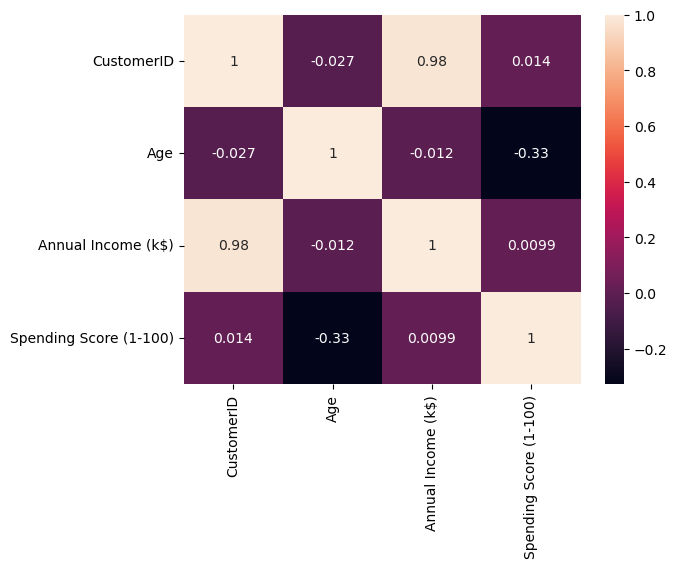

In [20]:
sns.heatmap(df.corr(),annot=True)

# Clustering Using K-Means

### 1.Segmentation using Age and Spending Score

In [21]:
X1 = df[['Age' , 'Spending Score (1-100)']].iloc[: , :].values
inertia = []
#WCSS  =[]   # Within Cluster sum of Squares
for n in range(1 , 13):
    algorithm = (KMeans(n_clusters = n ,init='k-means++', n_init = 10 ,max_iter=300, 
                        tol=0.0001,  random_state= 111  , algorithm='elkan') )
    algorithm.fit(X1)
    inertia.append(algorithm.inertia_) #inertia. This is the compactness of the cluster. The lower the better

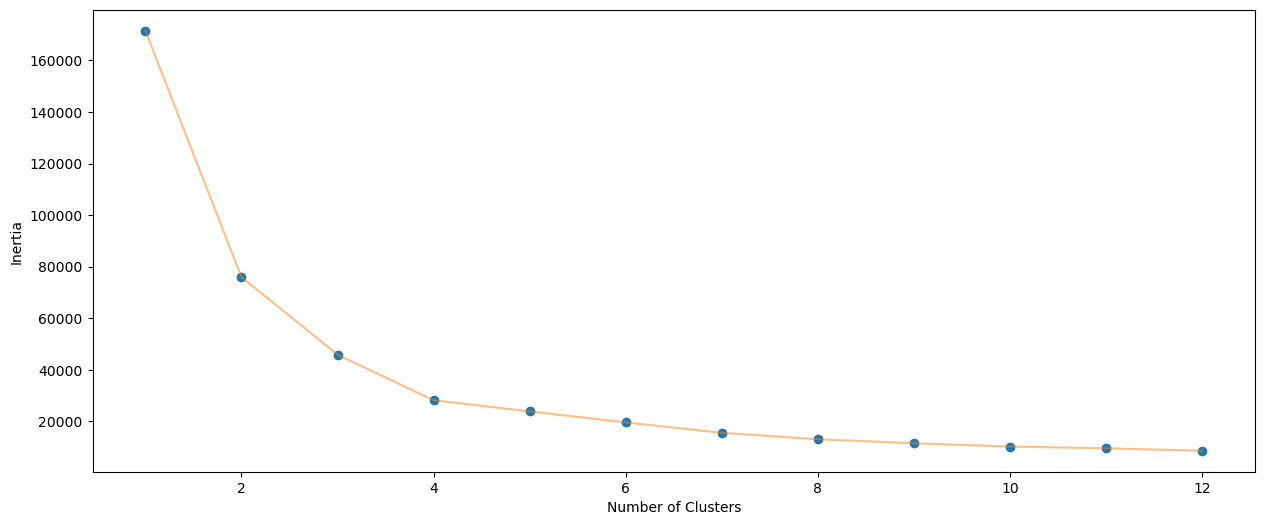

In [22]:
plt.figure(1 , figsize = (15 ,6))
plt.plot(np.arange(1 , 13) , inertia , 'o')
plt.plot(np.arange(1 , 13) , inertia , '-' , alpha = 0.5)
plt.xlabel('Number of Clusters')
plt.ylabel('Inertia')
plt.show()

Pick the  elbow shape  with the lower inerta  which is the compactness . In the above it is 4

In [23]:
algorithm = (KMeans(n_clusters = 4 ,init='k-means++', n_init = 10 ,max_iter=300, 
                        tol=0.0001,  random_state= 111  , algorithm='elkan') )
algorithm.fit(X1)
labels1 = algorithm.labels_
centroids1 = algorithm.cluster_centers_

In [24]:
h = 0.02
x_min, x_max = X1[:, 0].min() - 1, X1[:, 0].max() + 1
y_min, y_max = X1[:, 1].min() - 1, X1[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
Z = algorithm.predict(np.c_[xx.ravel(), yy.ravel()])

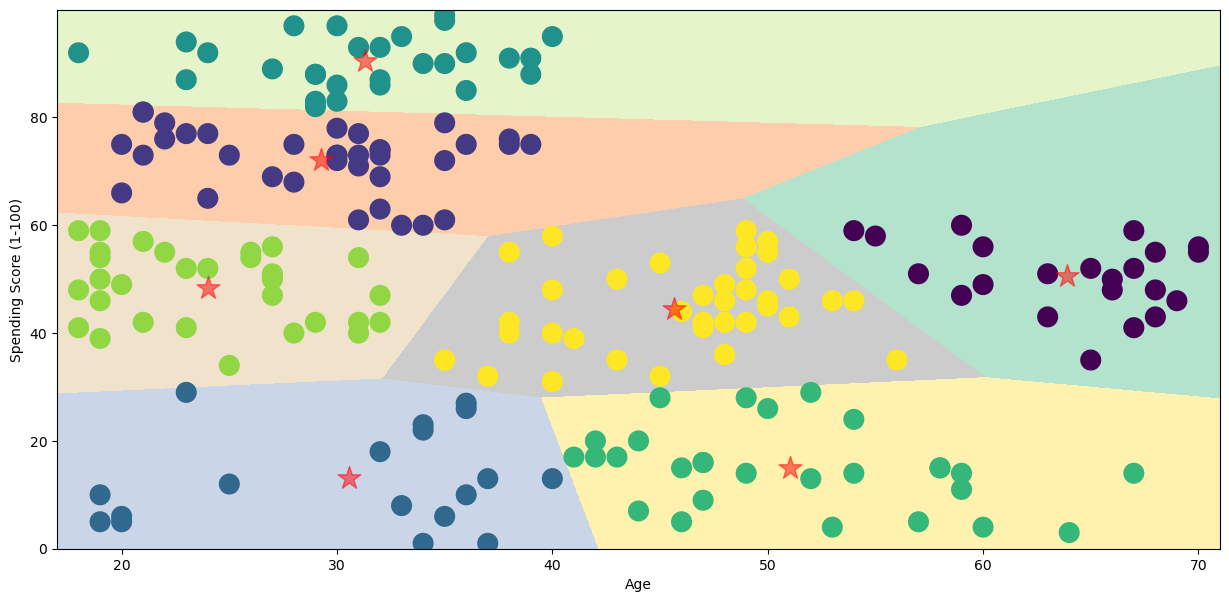

In [25]:
plt.figure(1 , figsize = (15 , 7) )
plt.clf()
Z = Z.reshape(xx.shape)
plt.imshow(Z , interpolation='nearest', 
           extent=(xx.min(), xx.max(), yy.min(), yy.max()),
           cmap = plt.cm.Pastel2, aspect = 'auto', origin='lower')

plt.scatter( x = 'Age' ,y = 'Spending Score (1-100)' , data = df , c = labels1 , 
            s = 200 )
plt.scatter(x = centroids1[: , 0] , y =  centroids1[: , 1] , s = 300 , c = 'red', marker = "*" , alpha = 0.5)
plt.ylabel('Spending Score (1-100)') , plt.xlabel('Age')
plt.show()

## Clustering - Univariate , Bivariate , Multivariate

In [26]:
clustering1= KMeans(n_clusters=7)

In [27]:
clustering1.fit(df[['Annual Income (k$)']])

KMeans(n_clusters=7)

In [28]:
clustering1.labels_

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4,
       4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4,
       4, 4, 4, 4, 4, 4, 4, 4, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6,
       6, 6, 6, 6, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 2, 2, 2, 2,
       2, 2])

In [29]:
df['income cluster']=clustering1.labels_
df.sample(10)

CustomerID  Gender  Age  Annual Income (k$)  Spending Score (1-100)  \
151         152    Male   39                  78                      88   
115         116  Female   19                  65                      50   
112         113  Female   38                  64                      42   
164         165    Male   50                  85                      26   
74           75    Male   59                  54                      47   
94           95  Female   32                  60                      42   
185         186    Male   30                  99                      97   
67           68  Female   68                  48                      48   
28           29  Female   40                  29                      31   
71           72  Female   47                  49                      42   

     income cluster  
151               3  
115               0  
112               0  
164               6  
74                0  
94                0  
185               5  
67                4  
28                1  
71                4

In [30]:
df['income cluster'].value_counts()

0    48
4    42
3    42
1    32
6    16
5    14
2     6
Name: income cluster, dtype: int64

### 2. Annual Income and Spending Score

In [31]:
X2 = df[['Annual Income (k$)' , 'Spending Score (1-100)']].iloc[: , :].values
inertia = []
for n in range(1 , 11):
    algorithm = (KMeans(n_clusters = n ,init='k-means++', n_init = 10 ,max_iter=300, 
                        tol=0.0001,  random_state= 111  , algorithm='elkan') )
    algorithm.fit(X2)
    inertia.append(algorithm.inertia_)

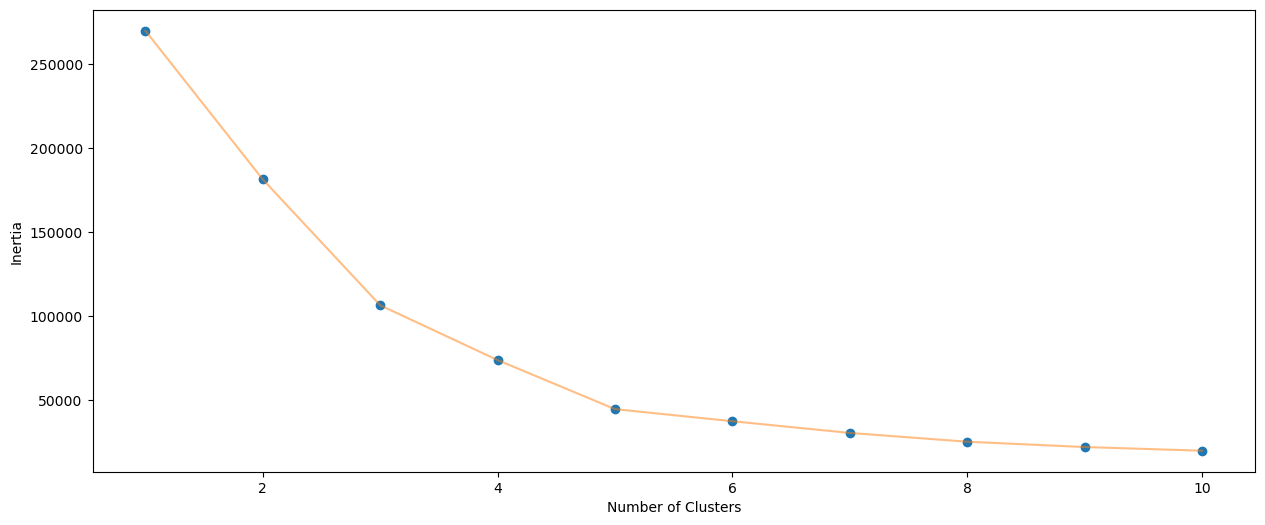

In [32]:
plt.figure(1 , figsize = (15 ,6))
plt.plot(np.arange(1 , 11) , inertia , 'o')
plt.plot(np.arange(1 , 11) , inertia , '-' , alpha = 0.5)
plt.xlabel('Number of Clusters') , plt.ylabel('Inertia')
plt.show()

### Here the elbow is 5 with low inertia  so the number of  clusters  should be 5

In [33]:
algorithm = (KMeans(n_clusters = 5 ,init='k-means++', n_init = 10 ,max_iter=300, 
                        tol=0.0001,  random_state= 111  , algorithm='elkan') )
algorithm.fit(X2)
labels2 = algorithm.labels_
centroids2 = algorithm.cluster_centers_

In [34]:
algorithm = (KMeans(n_clusters = 5 ,init='k-means++', n_init = 10 ,max_iter=300, 
                        tol=0.0001,  random_state= 111  , algorithm='elkan') )
algorithm.fit(X2)
labels2 = algorithm.labels_
centroids2 = algorithm.cluster_centers_

In [35]:
h = 0.02
x_min, x_max = X2[:, 0].min() - 1, X2[:, 0].max() + 1
y_min, y_max = X2[:, 1].min() - 1, X2[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
Z2 = algorithm.predict(np.c_[xx.ravel(), yy.ravel()]) 

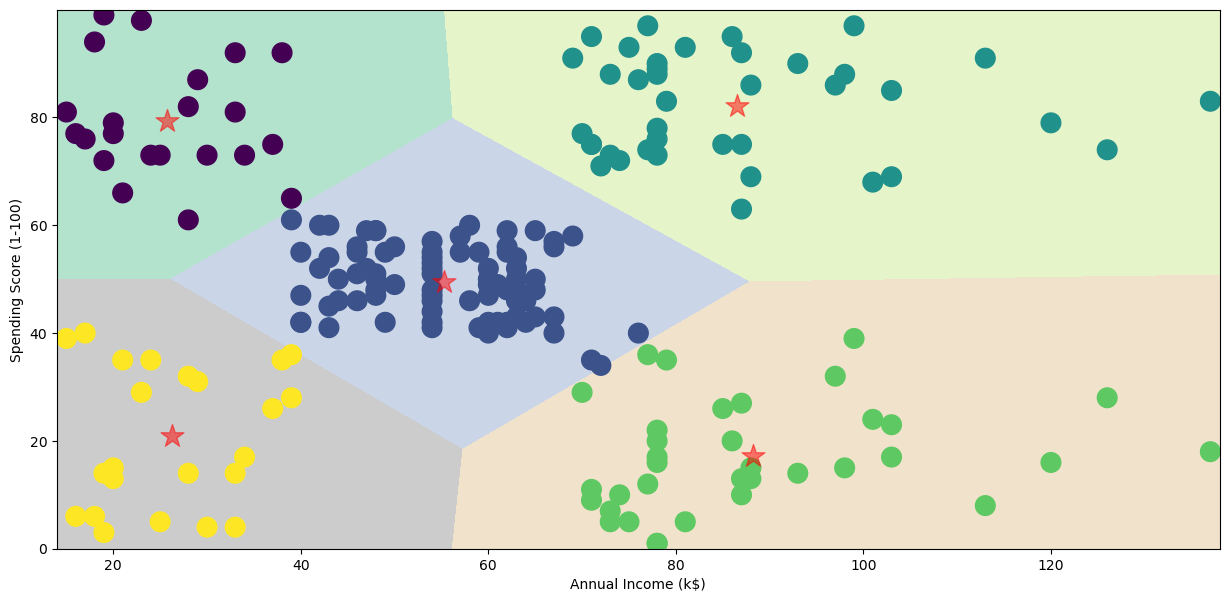

In [37]:
plt.figure(1 , figsize = (15 , 7) )
plt.clf()
Z2 = Z2.reshape(xx.shape)
plt.imshow(Z2 , interpolation='nearest', 
           extent=(xx.min(), xx.max(), yy.min(), yy.max()),
           cmap = plt.cm.Pastel2, aspect = 'auto', origin='lower')

plt.scatter( x = 'Annual Income (k$)' ,y = 'Spending Score (1-100)' , data =df , c = labels2 , 
            s = 200 )
plt.scatter(x = centroids2[: , 0] , y =  centroids2[: , 1] , s = 300 , c = 'red', marker = '*', alpha = 0.5)
plt.ylabel('Spending Score (1-100)') , plt.xlabel('Annual Income (k$)')
plt.show()

# 3.Segmentation using Age , Annual Income and Spending Score

In [44]:
X3 = df[['Age' , 'Annual Income (k$)' ,'Spending Score (1-100)']].iloc[: , :].values
inertia = []
for n in range(1 , 11):
    algorithm = (KMeans(n_clusters = n ,init='k-means++', n_init = 10 ,max_iter=300, 
                        tol=0.0001,  random_state= 111  , algorithm='elkan') )
    algorithm.fit(X3)
    inertia.append(algorithm.inertia_)

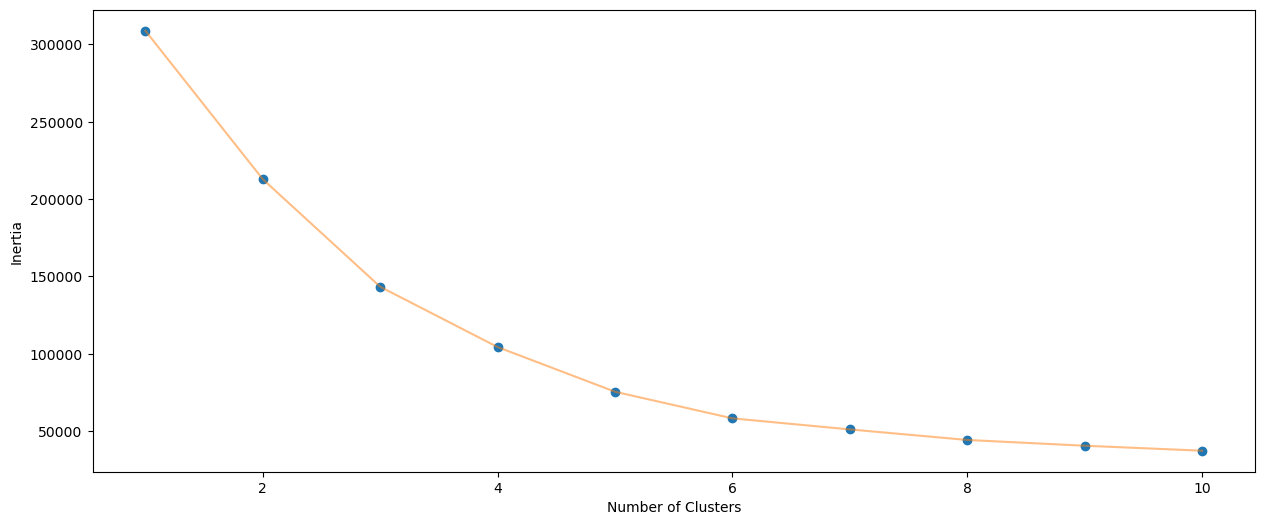

In [45]:
plt.figure(1 , figsize = (15 ,6))
plt.plot(np.arange(1 , 11) , inertia , 'o')
plt.plot(np.arange(1 , 11) , inertia , '-' , alpha = 0.5)
plt.xlabel('Number of Clusters') , plt.ylabel('Inertia')
plt.show()

In [46]:
algorithm = (KMeans(n_clusters = 6 ,init='k-means++', n_init = 10 ,max_iter=300, 
                        tol=0.0001,  random_state= 111  , algorithm='elkan') )
algorithm.fit(X3)
labels3 = algorithm.labels_
centroids3 = algorithm.cluster_centers_

In [56]:
# Import the necessary modules from Plotly
import plotly.graph_objs as go
from plotly.offline import iplot

df['label3'] =  labels3
trace1 = go.Scatter3d(
    x= df['Age'],
    y= df['Spending Score (1-100)'],
    z= df['Annual Income (k$)'],
    mode='markers',
     marker=dict(
        color =labels3, 
        size= 20,
        line=dict(
            color=labels3,
            width= 12
        ),
        opacity=0.8
     )
)
data = [trace1]
layout = go.Layout(
)

# Create a figure
fig = go.Figure(data=data, layout=layout)

# Display the 3D scatter plot using iplot
iplot(fig)

 what is inertia

In [57]:
clustering1.inertia_  ##  what is inertia. This is the compactness of the cluster. The lower the better

3931.988095238096

In [58]:
inertia_scores = []
for i in range(1,11):
    kmeans=KMeans(n_clusters=i)
    kmeans.fit(df[['Annual Income (k$)']])
    inertia_scores.append(kmeans.inertia_)

In [59]:
inertia_scores

[137277.28000000003,
 48660.88888888889,
 23528.152173913055,
 13278.112713472487,
 8481.496190476191,
 5050.904761904763,
 3931.988095238096,
 2822.4996947496943,
 2274.165567765568,
 1763.6207792207792]

<function matplotlib.pyplot.show(close=None, block=None)>

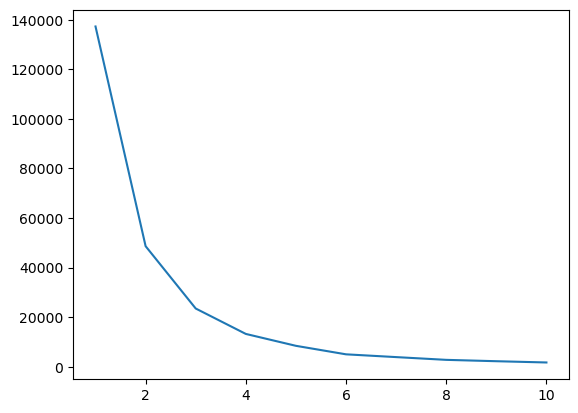

In [60]:
plt.plot(range(1,11),inertia_scores)
plt.show

In [61]:
df.groupby('income cluster')[['Age', 'Spending Score (1-100)', 'Annual Income (k$)']].mean()

Age  Spending Score (1-100)  Annual Income (k$)
income cluster                                                       
0               41.604167               49.041667           60.083333
1               34.906250               49.656250           22.000000
2               36.833333               49.666667          127.666667
3               35.428571               51.095238           75.095238
4               43.000000               50.666667           42.238095
5               36.500000               53.000000          102.000000
6               39.375000               48.937500           87.625000

In [62]:
clustering2=KMeans(n_clusters=5)
clustering2.fit(df[['Annual Income (k$)','Spending Score (1-100)']])

KMeans(n_clusters=5)

In [63]:
clustering2.labels_
df['spending score & annual income']=clustering2.labels_
df.head()

CustomerID  Gender  Age  Annual Income (k$)  Spending Score (1-100)  \
0           1    Male   19                  15                      39   
1           2    Male   21                  15                      81   
2           3  Female   20                  16                       6   
3           4  Female   23                  16                      77   
4           5  Female   31                  17                      40   

   income cluster  spending score & annual income  label3  
0               1                               3       4  
1               1                               0       5  
2               1                               3       4  
3               1                               0       5  
4               1                               3       4

In [64]:
clustering2.inertia_

44448.45544793371

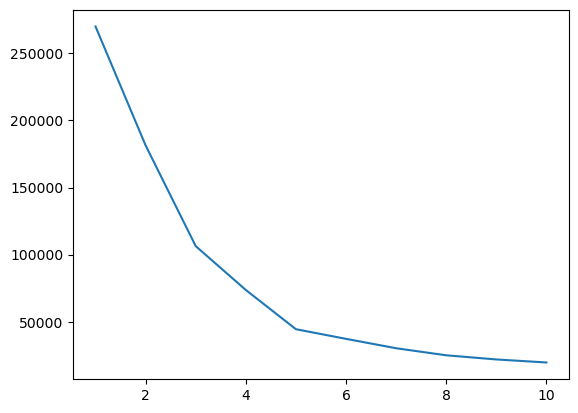

In [65]:
inertia_scores2=[]
for  i in  range(1,11):
    kmeans2=KMeans(n_clusters=i)
    kmeans2.fit(df[['Annual Income (k$)','Spending Score (1-100)']])
    inertia_scores2.append(kmeans2.inertia_)
plt.plot(range(1,11),inertia_scores2)

In [66]:
centers=pd.DataFrame(clustering2.cluster_centers_)
centers.columns=['x','y']
centers

x          y
0  25.727273  79.363636
1  88.200000  17.114286
2  55.296296  49.518519
3  26.304348  20.913043
4  86.538462  82.128205

In [67]:
#I've known from my visuals that I have the best cluster index is 5
#Adding this n_cluster to KMeans clusters number

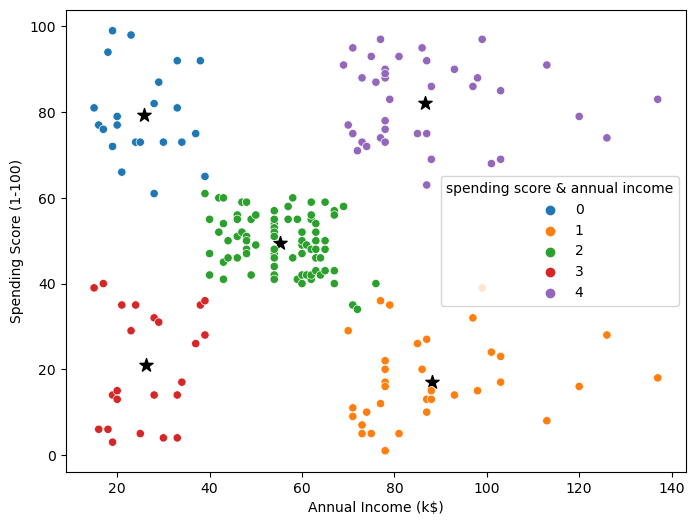

In [68]:
plt.figure(figsize=(8,6))
plt.scatter(x=centers['x'],y=centers['y'],s=100,c='black',marker='*')
sns.scatterplot(data = df,x='Annual Income (k$)',y= 'Spending Score (1-100)',hue='spending score & annual income',palette='tab10')
plt.savefig('Clustering Bivariate.png')